In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [67]:
df_cntt = pd.read_csv('BGCON_CNTT_DATA.csv', encoding = 'utf-8')

In [68]:
df_cntt.columns

Index(['POLY_NO', 'CUST_ID', 'CUST_ROLE', 'IRKD_CODE_DTAL', 'IRKD_CODE_ITEM',
       'GOOD_CLSF_CDNM', 'CNTT_YM', 'CLLT_FP_PRNO', 'REAL_PAYM_TERM',
       'SALE_CHNL_CODE', 'CNTT_STAT_CODE', 'EXPR_YM', 'EXTN_YM', 'LAPS_YM',
       'PAYM_CYCL_CODE', 'MAIN_INSR_AMT', 'SUM_ORIG_PREM', 'RECP_PUBL',
       'CNTT_RECP', 'MNTH_INCM_AMT', 'DISTANCE'],
      dtype='object')

In [69]:
df_cntt = df_cntt.drop(['IRKD_CODE_DTAL', 'IRKD_CODE_ITEM',
                        'GOOD_CLSF_CDNM', 'CNTT_YM',
                        'CNTT_STAT_CODE', 'EXPR_YM', 'EXTN_YM', 'LAPS_YM',
                        'PAYM_CYCL_CODE', 'MAIN_INSR_AMT', 'SUM_ORIG_PREM', 'RECP_PUBL',
                        'CNTT_RECP', 'MNTH_INCM_AMT'], axis=1)
df_cntt.isnull().sum()

POLY_NO               0
CUST_ID               0
CUST_ROLE             0
CLLT_FP_PRNO         82
REAL_PAYM_TERM        0
SALE_CHNL_CODE        0
DISTANCE          10556
dtype: int64

In [70]:
import pickle
with open("df_cust.pickle","rb") as fr:
    df_cust = pickle.load(fr)

In [71]:
df_cust = df_cust.drop(['SEX', 'AGE', 'RESI_COST', 'RESI_TYPE_CODE',
       'FP_CAREER', 'CUST_RGST', 'CTPR', 'OCCP_GRP_1', 'OCCP_GRP_2',
       'TOTALPREM', 'MINCRDT', 'MAXCRDT', 'WEDD_YN', 'MATE_OCCP_GRP_1',
       'MATE_OCCP_GRP_2', 'CHLD_CNT', 'CUST_INCM', 'RCBASE_HSHD_INCM',
       'JPBASE_HSHD_INCM', 'year', 'month'], axis=1)

In [72]:
df_cntt = pd.merge(df_cntt, df_cust, on = 'CUST_ID', how = 'inner')

In [73]:
df_cntt

,POLY_NO,CUST_ID,CUST_ROLE,CLLT_FP_PRNO,REAL_PAYM_TERM,SALE_CHNL_CODE,DISTANCE,SIU_CUST_YN
0,1,2805,1,4671.0,20,1,15.0,N
1,98492,2805,2,71.0,1,1,NaN,N
2,2,5658,1,5900.0,15,1,147.0,N
3,809,5658,5,5900.0,10,1,147.0,N
4,3296,5658,1,5900.0,15,1,147.0,N
...,...,...,...,...,...,...,...,...
104009,112564,9873,1,29488.0,10,2,34.0,N
104010,112565,9873,1,29488.0,0,2,34.0,N
104011,112569,2892,2,31477.0,15,2,7.0,N
104012,112709,18136,2,2216.0,5,2,2.0,N


In [9]:
!pip install pandasql
import numpy as np 
from pandasql import sqldf
dfsql = lambda q: sqldf(q, globals())

In [47]:
pay = dfsql('''select CUST_ID, avg(REAL_PAYM_TERM) as REAL_PAYM_TERM_AVG, SIU_CUST_YN from df_cntt group by CUST_ID''')

In [53]:
join_cnt = dfsql('''select CUST_ID, count(CUST_ID), SIU_CUST_YN from df_cntt group by CUST_ID''')
join_cnt

,CUST_ID,count(CUST_ID),SIU_CUST_YN
0,1,34,N
1,2,38,N
2,3,2,N
3,4,108,N
4,5,5,N
...,...,...,...
20602,22396,2,N
20603,22397,1,N
20604,22398,3,N
20605,22399,4,N


In [54]:
import pickle
with open("join_cnt.pickle","wb") as fw:
    pickle.dump(join_cnt, fw)

In [35]:
pay

,CUST_ID,REAL_PAYM_TERM_AVG,SIU_CUST_YN
0,1,3.147059,N
1,2,4.657895,N
2,3,10.000000,N
3,4,8.657407,N
4,5,12.200000,N
...,...,...,...
20602,22396,20.000000,N
20603,22397,15.000000,N
20604,22398,1.000000,N
20605,22399,16.750000,N


In [26]:
pay_yes = pay[pay['SIU_CUST_YN'] == 'Y']
pay_no = pay[pay['SIU_CUST_YN'] == 'N']

<AxesSubplot:xlabel='REAL_PAYM_TERM_AVG', ylabel='Density'>

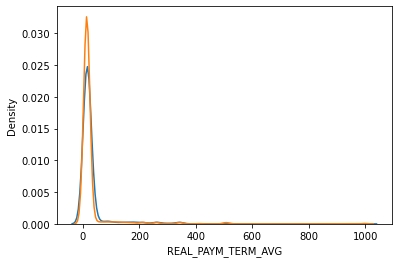

In [31]:
sns.kdeplot(x = 'REAL_PAYM_TERM_AVG', data = pay_yes)
sns.kdeplot(x = 'REAL_PAYM_TERM_AVG', data = pay_no)

<AxesSubplot:xlabel='REAL_PAYM_TERM_AVG', ylabel='Density'>

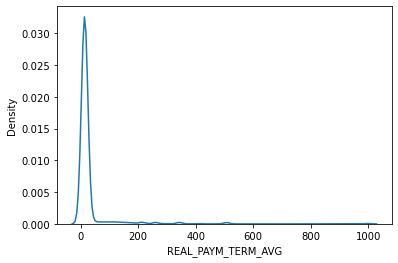

In [32]:
sns.kdeplot(x = 'REAL_PAYM_TERM_AVG', data = pay_no)

In [33]:
np.mean(pay_yes['REAL_PAYM_TERM_AVG'])

30.059442986321464

In [34]:
np.mean(pay_no['REAL_PAYM_TERM_AVG'])

28.237520318389077

In [12]:
df_cntt.isnull().sum()

POLY_NO              0
CUST_ID              0
CUST_ROLE            0
REAL_PAYM_TERM       0
SALE_CHNL_CODE       0
DISTANCE          9746
SIU_CUST_YN          0
dtype: int64

In [13]:
df_cntt_yes = df_cntt[df_cntt['SIU_CUST_YN']=='Y']
df_cntt_no = df_cntt[df_cntt['SIU_CUST_YN']=='N']

In [14]:
df_cntt.columns

Index(['POLY_NO', 'CUST_ID', 'CUST_ROLE', 'REAL_PAYM_TERM', 'SALE_CHNL_CODE',
       'DISTANCE', 'SIU_CUST_YN'],
      dtype='object')

<AxesSubplot:xlabel='CUST_ROLE', ylabel='count'>

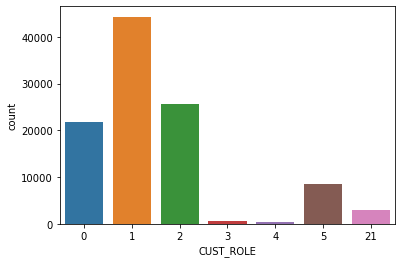

In [15]:
sns.countplot(x = 'CUST_ROLE', data = df_cntt)

<AxesSubplot:xlabel='CUST_ROLE', ylabel='count'>

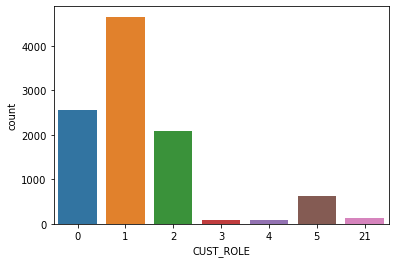

In [16]:
sns.countplot(x = 'CUST_ROLE', data = df_cntt_yes)

<AxesSubplot:xlabel='CUST_ROLE', ylabel='count'>

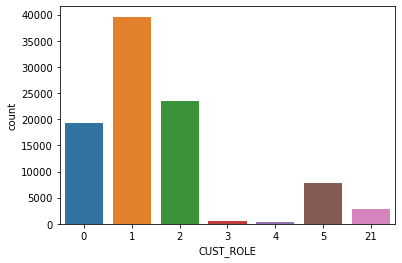

In [17]:
sns.countplot(x = 'CUST_ROLE', data = df_cntt_no)

In [18]:
df_cntt_yes['CUST_ROLE'].value_counts(normalize=True)

1     0.454741
0     0.250269
2     0.203300
5     0.061322
21    0.013963
3     0.008398
4     0.008007
Name: CUST_ROLE, dtype: float64

In [19]:
df_cntt_no['CUST_ROLE'].value_counts(normalize=True)

1     0.422371
2     0.250093
0     0.205763
5     0.083617
21    0.029635
3     0.005065
4     0.003455
Name: CUST_ROLE, dtype: float64

<AxesSubplot:xlabel='REAL_PAYM_TERM', ylabel='Density'>

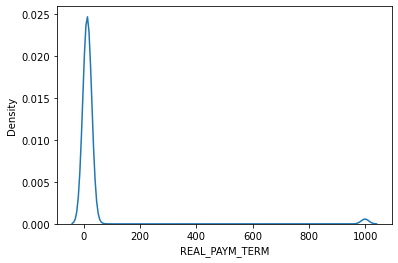

In [20]:
sns.kdeplot(x = 'REAL_PAYM_TERM', data = df_cntt)

<AxesSubplot:xlabel='REAL_PAYM_TERM', ylabel='Density'>

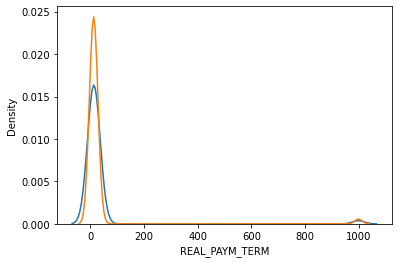

In [21]:
sns.kdeplot(x = 'REAL_PAYM_TERM', data = df_cntt_yes)
sns.kdeplot(x = 'REAL_PAYM_TERM', data = df_cntt_no)

In [22]:
np.mean(df_cntt_yes['REAL_PAYM_TERM'])

34.3584610877844

In [23]:
np.mean(df_cntt_no['REAL_PAYM_TERM'])

32.02853699892293

In [24]:
df_cntt_yes[df_cntt_yes['REAL_PAYM_TERM']<25]

,POLY_NO,CUST_ID,CUST_ROLE,REAL_PAYM_TERM,SALE_CHNL_CODE,DISTANCE,SIU_CUST_YN
9,3,4583,1,5,1,3.0,Y
10,1063,4583,1,15,1,3.0,Y
11,4012,4583,0,10,1,0.0,Y
12,4246,4583,0,15,1,4.0,Y
13,14521,4583,1,20,1,1.0,Y
...,...,...,...,...,...,...,...
102721,100770,3564,2,0,1,10.0,Y
102756,101269,9636,2,20,1,7.0,Y
102757,101270,9636,2,0,1,7.0,Y
102758,101288,9636,2,20,1,7.0,Y


In [25]:
df_cntt_no[df_cntt_no['REAL_PAYM_TERM']<25]

,POLY_NO,CUST_ID,CUST_ROLE,REAL_PAYM_TERM,SALE_CHNL_CODE,DISTANCE,SIU_CUST_YN
0,1,2805,1,20,1,15.0,N
1,98492,2805,2,1,1,NaN,N
2,2,5658,1,15,1,147.0,N
3,809,5658,5,10,1,147.0,N
4,3296,5658,1,15,1,147.0,N
...,...,...,...,...,...,...,...
104009,112564,9873,1,10,2,34.0,N
104010,112565,9873,1,0,2,34.0,N
104011,112569,2892,2,15,2,7.0,N
104012,112709,18136,2,5,2,2.0,N


<AxesSubplot:xlabel='SALE_CHNL_CODE', ylabel='count'>

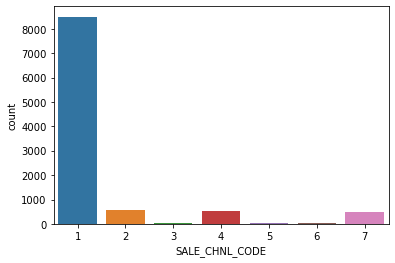

In [56]:
sns.countplot(x = 'SALE_CHNL_CODE', data = df_cntt_yes)

<AxesSubplot:xlabel='SALE_CHNL_CODE', ylabel='count'>

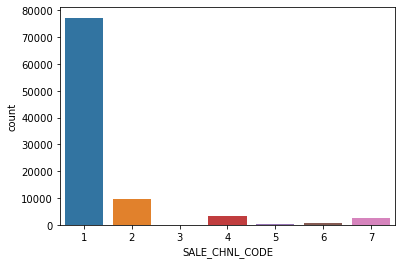

In [55]:
sns.countplot(x = 'SALE_CHNL_CODE', data = df_cntt_no)

In [57]:
df_cntt_yes['SALE_CHNL_CODE'].value_counts(normalize=True)

1    0.829118
2    0.057123
4    0.053510
7    0.048433
6    0.005273
3    0.003808
5    0.002734
Name: SALE_CHNL_CODE, dtype: float64

In [58]:
df_cntt_no['SALE_CHNL_CODE'].value_counts(normalize=True)

1    0.823851
2    0.102684
4    0.033538
7    0.026010
6    0.007273
5    0.005257
3    0.001386
Name: SALE_CHNL_CODE, dtype: float64

<AxesSubplot:xlabel='DISTANCE', ylabel='Density'>

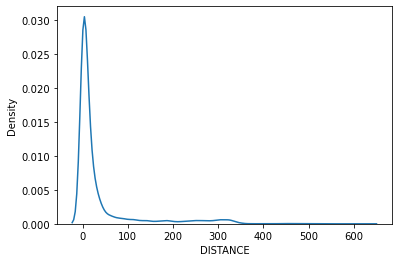

In [61]:
sns.kdeplot(x = 'DISTANCE', data = df_cntt)

<AxesSubplot:xlabel='DISTANCE', ylabel='Density'>

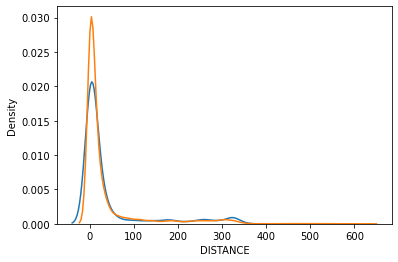

In [64]:
sns.kdeplot(x = 'DISTANCE', data = df_cntt_yes)
sns.kdeplot(x = 'DISTANCE', data = df_cntt_no)

<AxesSubplot:xlabel='DISTANCE', ylabel='Density'>

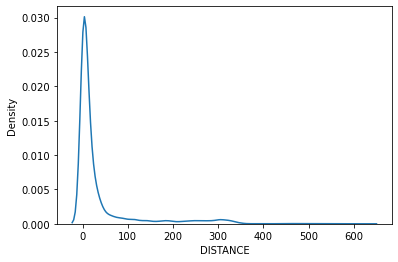

In [63]:
sns.kdeplot(x = 'DISTANCE', data = df_cntt_no)

In [65]:
np.mean(df_cntt_yes['DISTANCE'])

40.98290063601293

In [66]:
np.mean(df_cntt_no['DISTANCE'])

36.90319685392728